(427961, 103970) 0:00:09.812


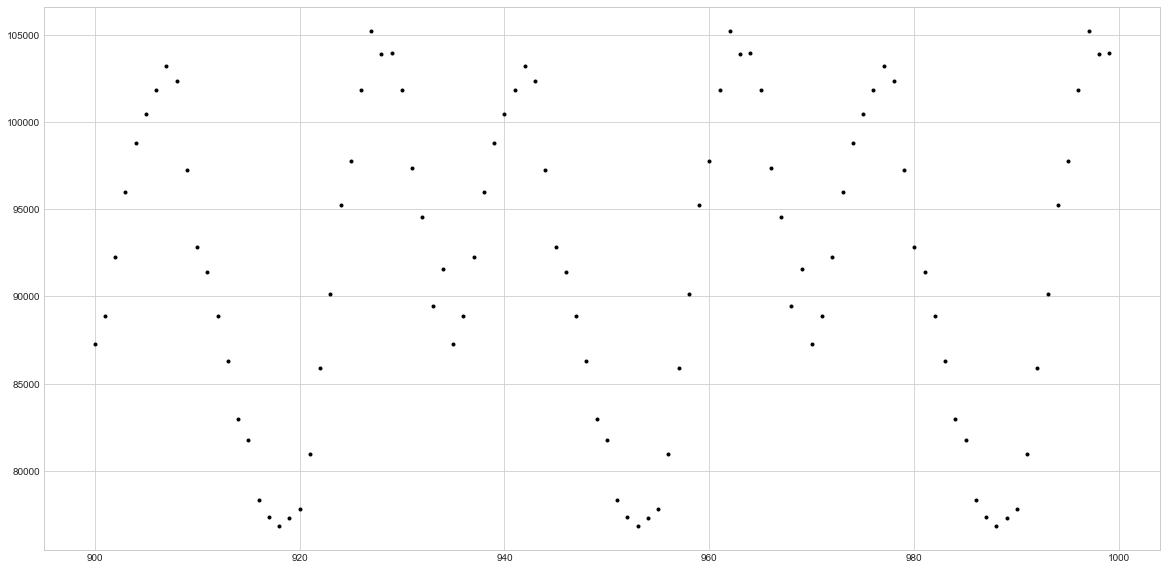

In [102]:
#!/usr/bin/python
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
filepath = 'test.txt'
filepath = 'input.txt'

from datetime import datetime
startTime = datetime.now()

def main() -> "result1, result2":
    state = []
    result1 , result2 = 0, 0
    with open(filepath) as f:
        for line in f.readlines():
            state.append(line.strip())
        f.close()
        
    scores =[]
    newstate = []
    iterations = 1000
    for t in range(iterations):
        newstate = list(state)
        for y, row in enumerate(state):
            for x, item in enumerate(row):
                adjacent = ''
        
                for i in range(3):
                    if x-1+i > -1 and x-1+i < len(row): # above and below 3
                        if y-1 > -1:
                            adjacent = adjacent + state[y-1][x-1+i]
                        if y+1 < len(state):
                            adjacent = adjacent + state[y+1][x-1+i]
                        
                if x-1 > -1: # side and side
                    adjacent = adjacent + row[x-1]
                if x+1 < len(row):
                    adjacent = adjacent + row[x+1]
                
                if item == '.' and adjacent.count('|') >= 3:
                    newstate[y] = newstate[y][:x] + '|' + state[y][x+1:]
                if item == '|' and adjacent.count('#') >= 3:
                    newstate[y] = newstate[y][:x] + '#' + state[y][x+1:]
                    
                if item == '#' and not (adjacent.count('|') >= 1 and adjacent.count('#') >= 1):
                    newstate[y] = newstate[y][:x] + '.' + state[y][x+1:]
        
        state = newstate.copy()
        trees, lumberyards = 0, 0
        for row in state:
            trees += row.count('|')
            lumberyards += row.count('#')  
        scores.append(trees*lumberyards)

    # found oscillating pattern occuring after approx min 800
    plt.figure(figsize=(20,10))
    plt.plot(range(900, iterations), scores[900:], '.', color='black')
    # upon closer examination, frequency = 35, phase shift = 920
    # 1000000000 minute is same as (1000000000-920)%35+920 minute
    
    return scores[9], scores[929]

if __name__ == '__main__':
    print(main(), str(datetime.now() - startTime)[:-3]) # (427961, 103970) 0:00:10.241